In [1]:
import PIL.Image as img 
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 
import os.path 
import glob 

_FOLDERS_MAP = {
    'left_pre': '/home/jiarui/git/Deeplab_GTA/leftvis/segmentation_results/000107.jpg_000575_prediction.png',
    'left_fullseg': '/home/jiarui/git/Deeplab_GTA/Results/left_prediction/000107.jpg_000575_prediction_fullseg.png',
    'left_est': '/home/jiarui/git/Deeplab_GTA/Results/000107.jpg_000575_prediction.png',
    'left_est_inpaint': '/home/jiarui/git/Deeplab_GTA/Results/000107.jpg_000575_prediction_inpaint.png',
    'left_fullseg_est': '/home/jiarui/git/Deeplab_GTA/Results/000107.jpg_000575_prediction_fullseg.png',
    'left_fullseg_inpaint': '/home/jiarui/git/Deeplab_GTA/Results/000107.jpg_000575_prediction_fullseg_inpaint.png',
    'gt': '/home/jiarui/git/Deeplab_GTA/Results/4034387.png',
}

_PATTERN_MAP = {
    'right': '_prediction.png',
    'left_est': '_prediction.png',
    'left': '_prediction.png',
    'gt': '.png',
}

In [4]:
def _get_files(data):
    pattern = '*%s' % (_PATTERN_MAP[data])
    search_files = os.path.join(_FOLDERS_MAP[data])
    filenames = glob.glob(search_files)
    return sorted(filenames)

In [6]:
left_pre = img.open(_FOLDERS_MAP['left_pre'])
left_fullseg = img.open(_FOLDERS_MAP['left_fullseg'])
left_est = img.open(_FOLDERS_MAP['left_est'])
left_est_inpaint = img.open(_FOLDERS_MAP['left_est_inpaint'])
left_fullseg_est = img.open(_FOLDERS_MAP['left_fullseg_est'])
left_fullseg_inpaint = img.open(_FOLDERS_MAP['left_fullseg_inpaint'])
gt_image = img.open(_FOLDERS_MAP['gt'])
#left_est.show()
#left_image.show()
#gt_image.show()
#right_image.show()

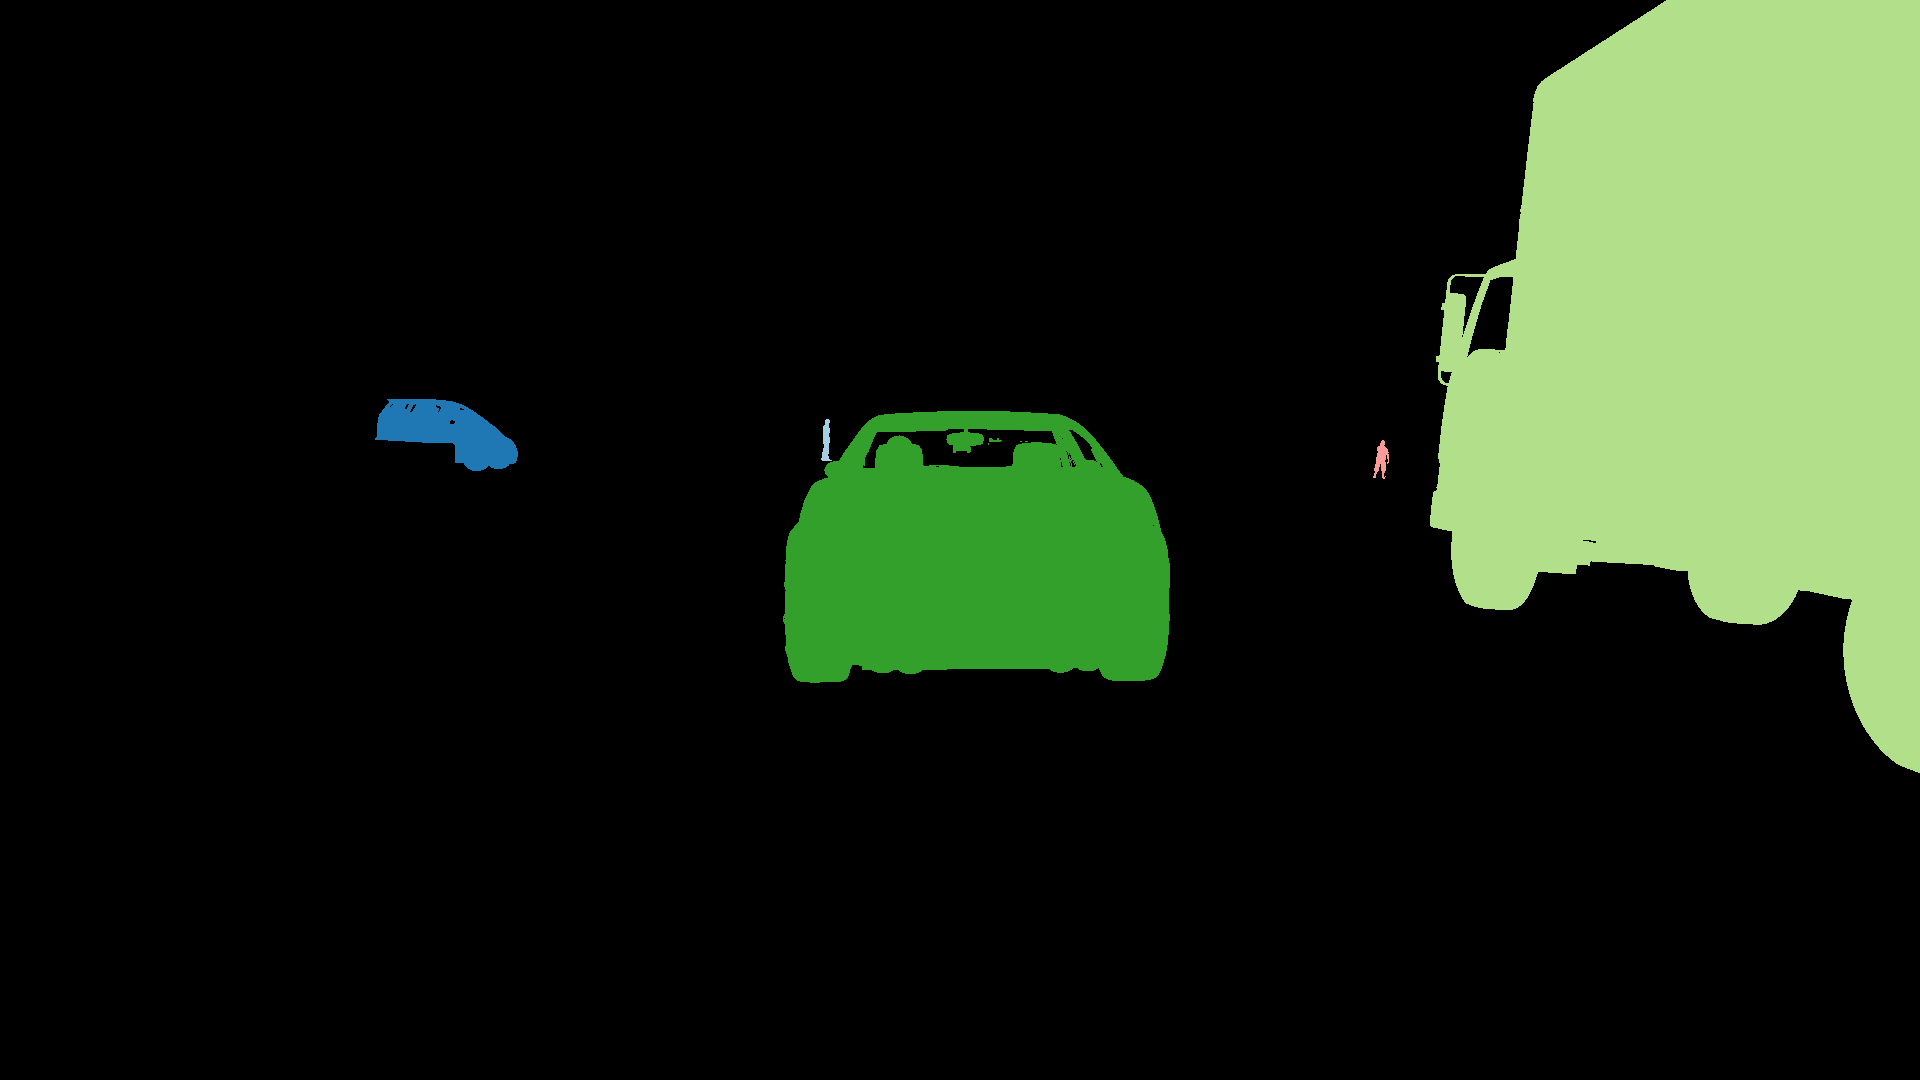

In [7]:
#ground truth
gt_image

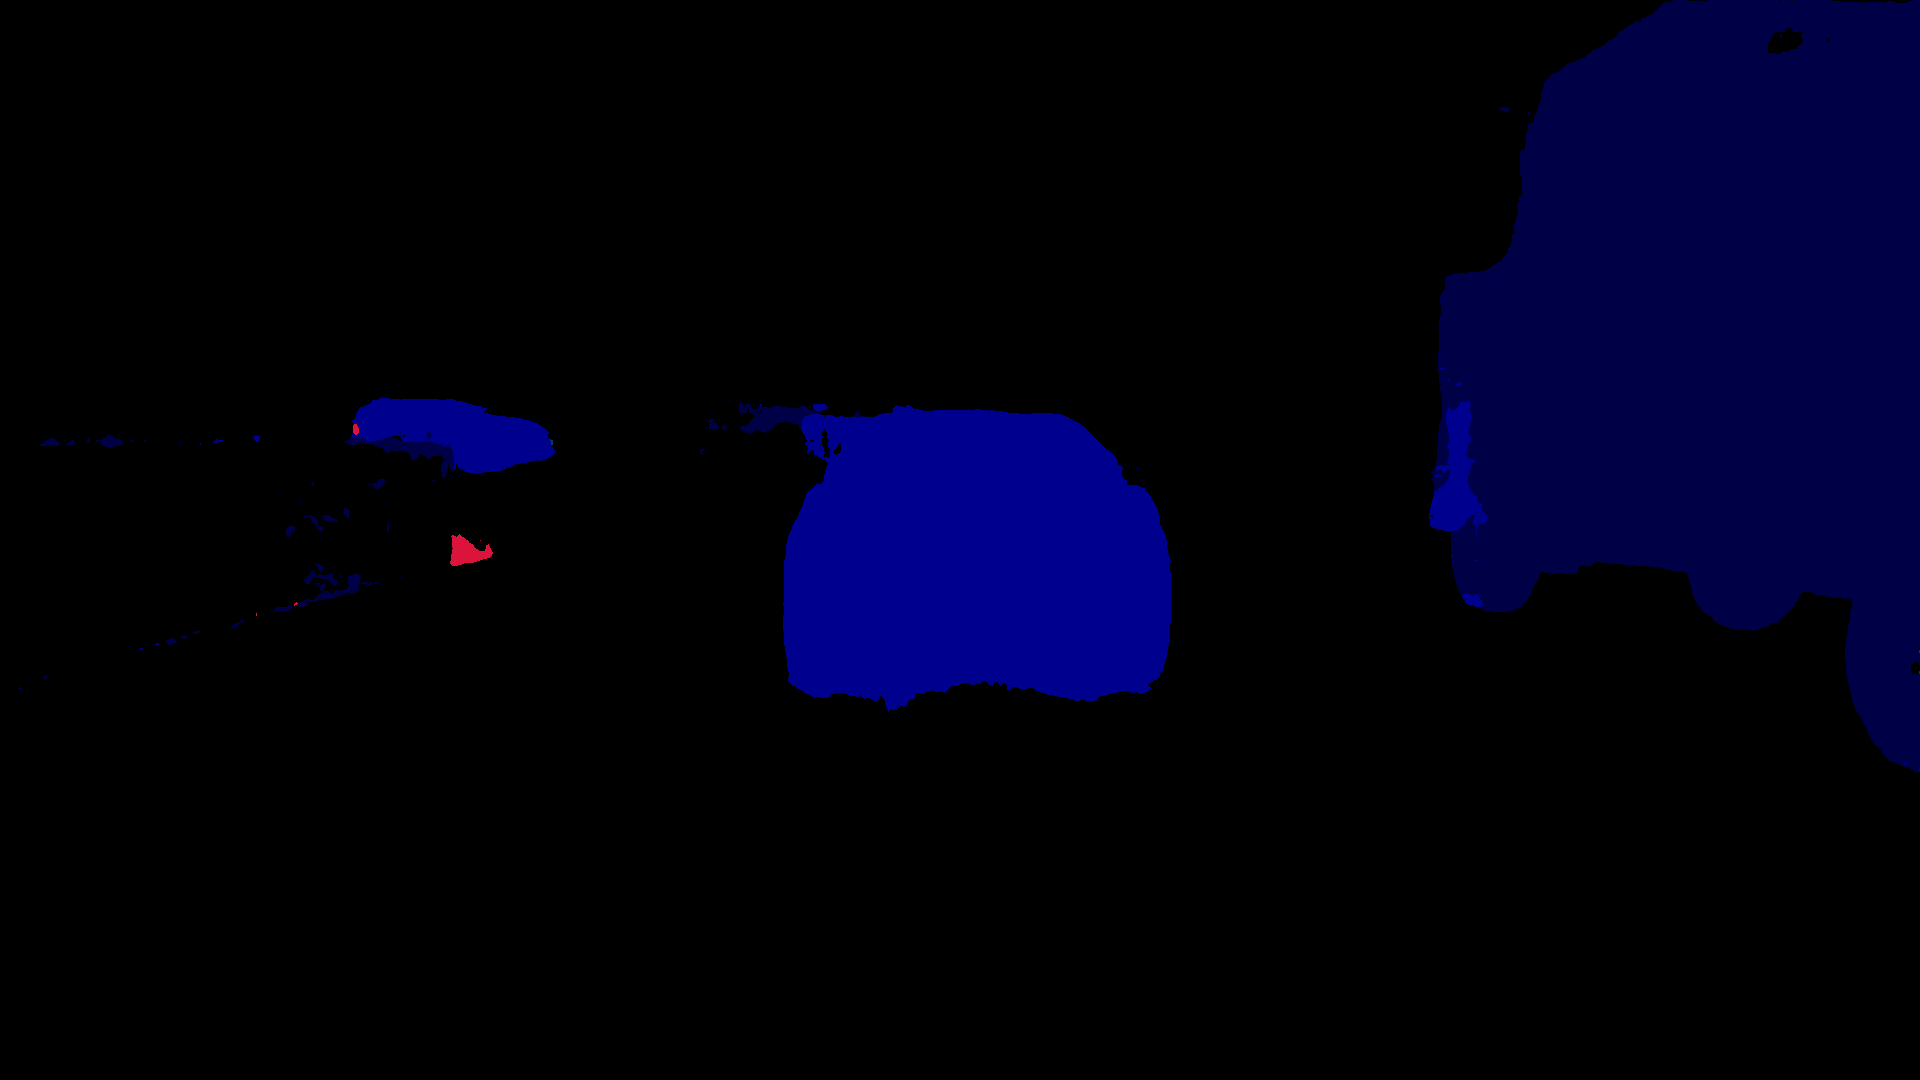

In [8]:
# Deeplab left segmentation result
left_pre

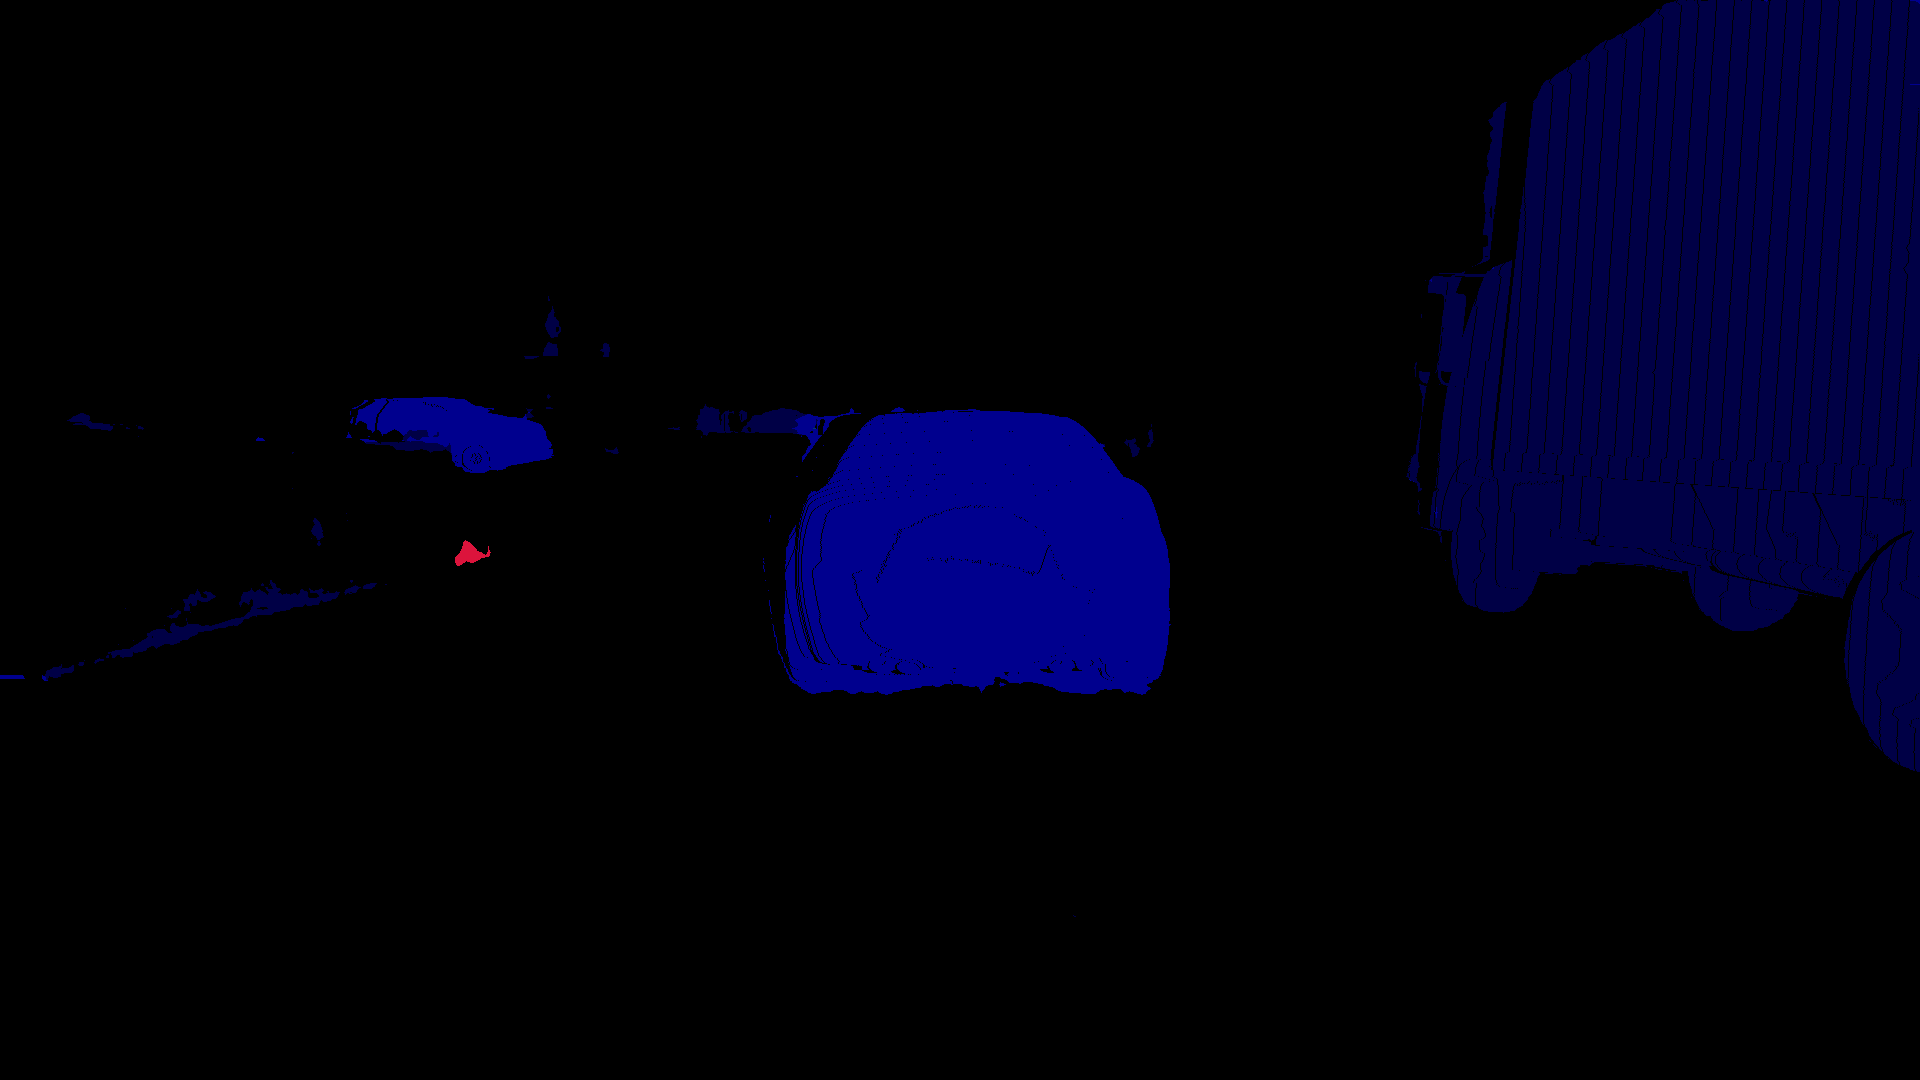

In [9]:
# Reconstructed left prediction
left_est

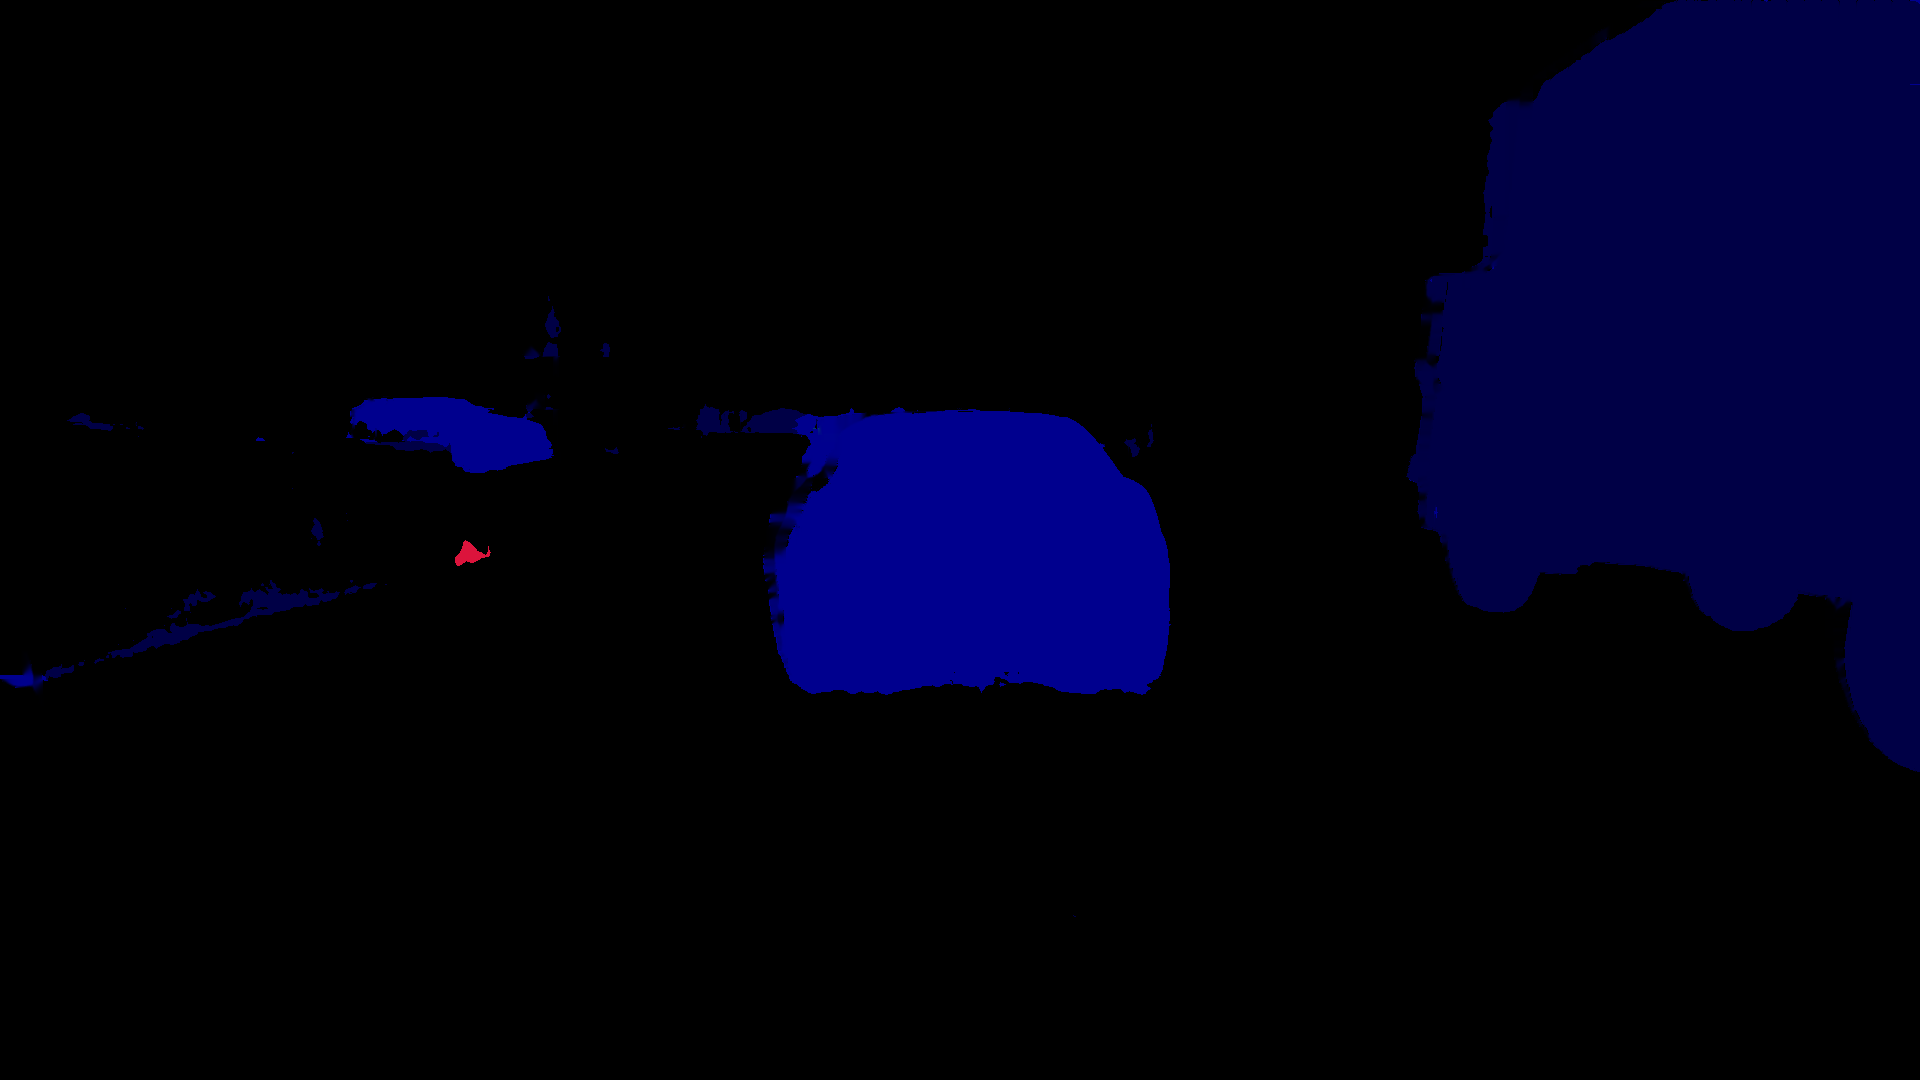

In [10]:
# Infilling Reconstructed left prediction
left_est_inpaint

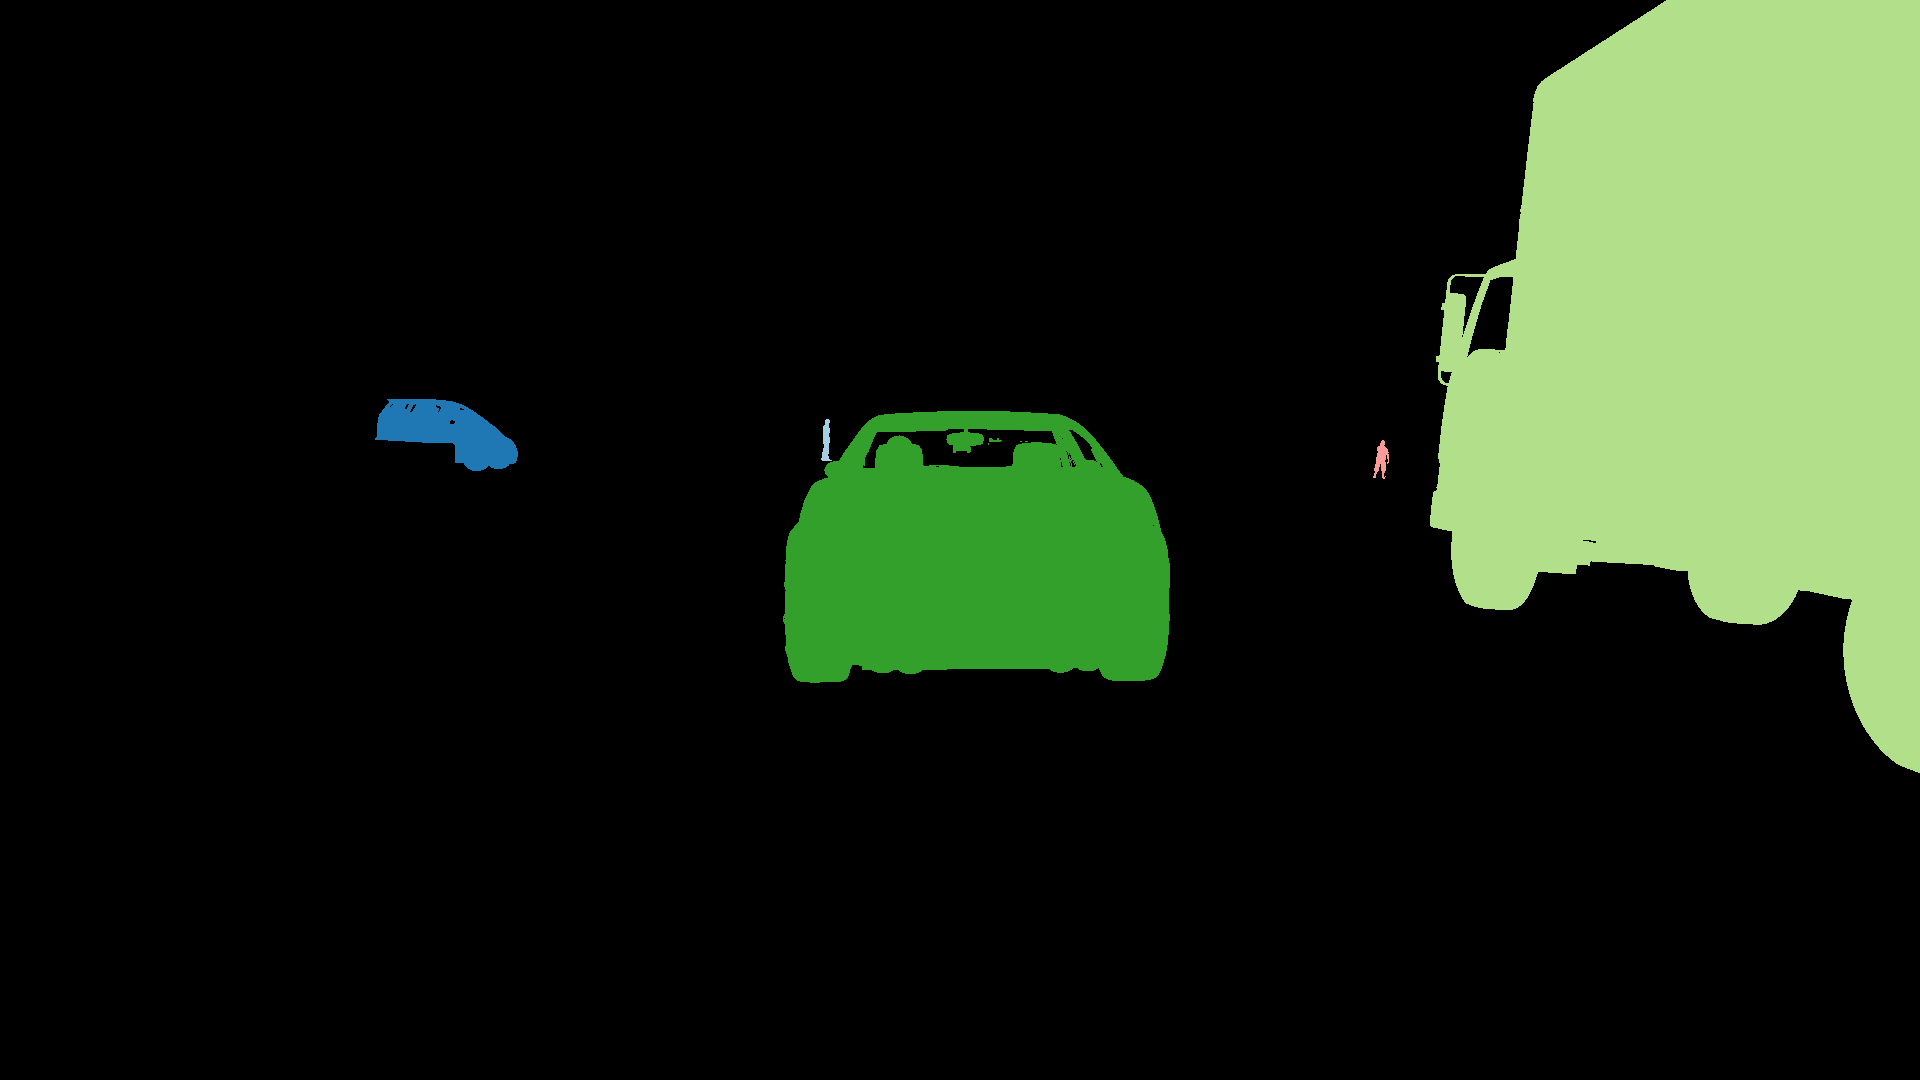

In [11]:
gt_image

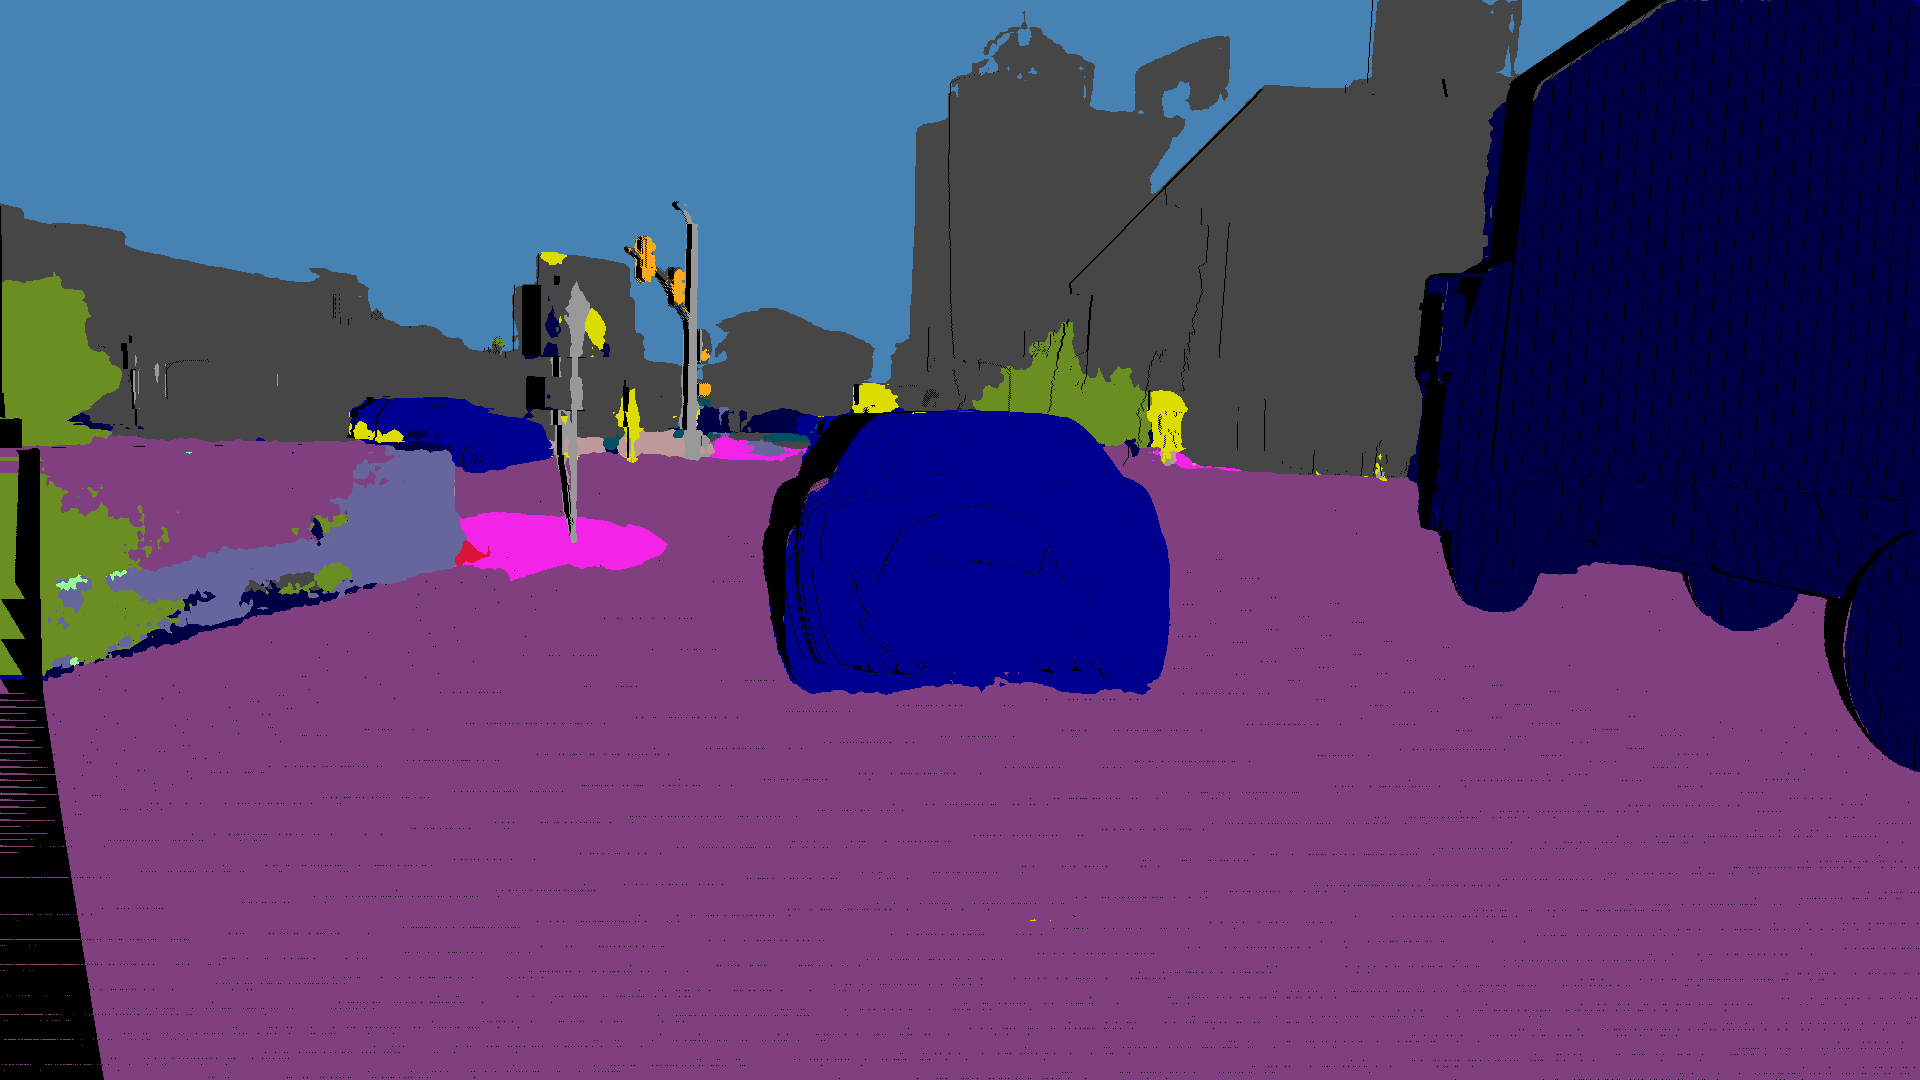

In [12]:
left_fullseg_est

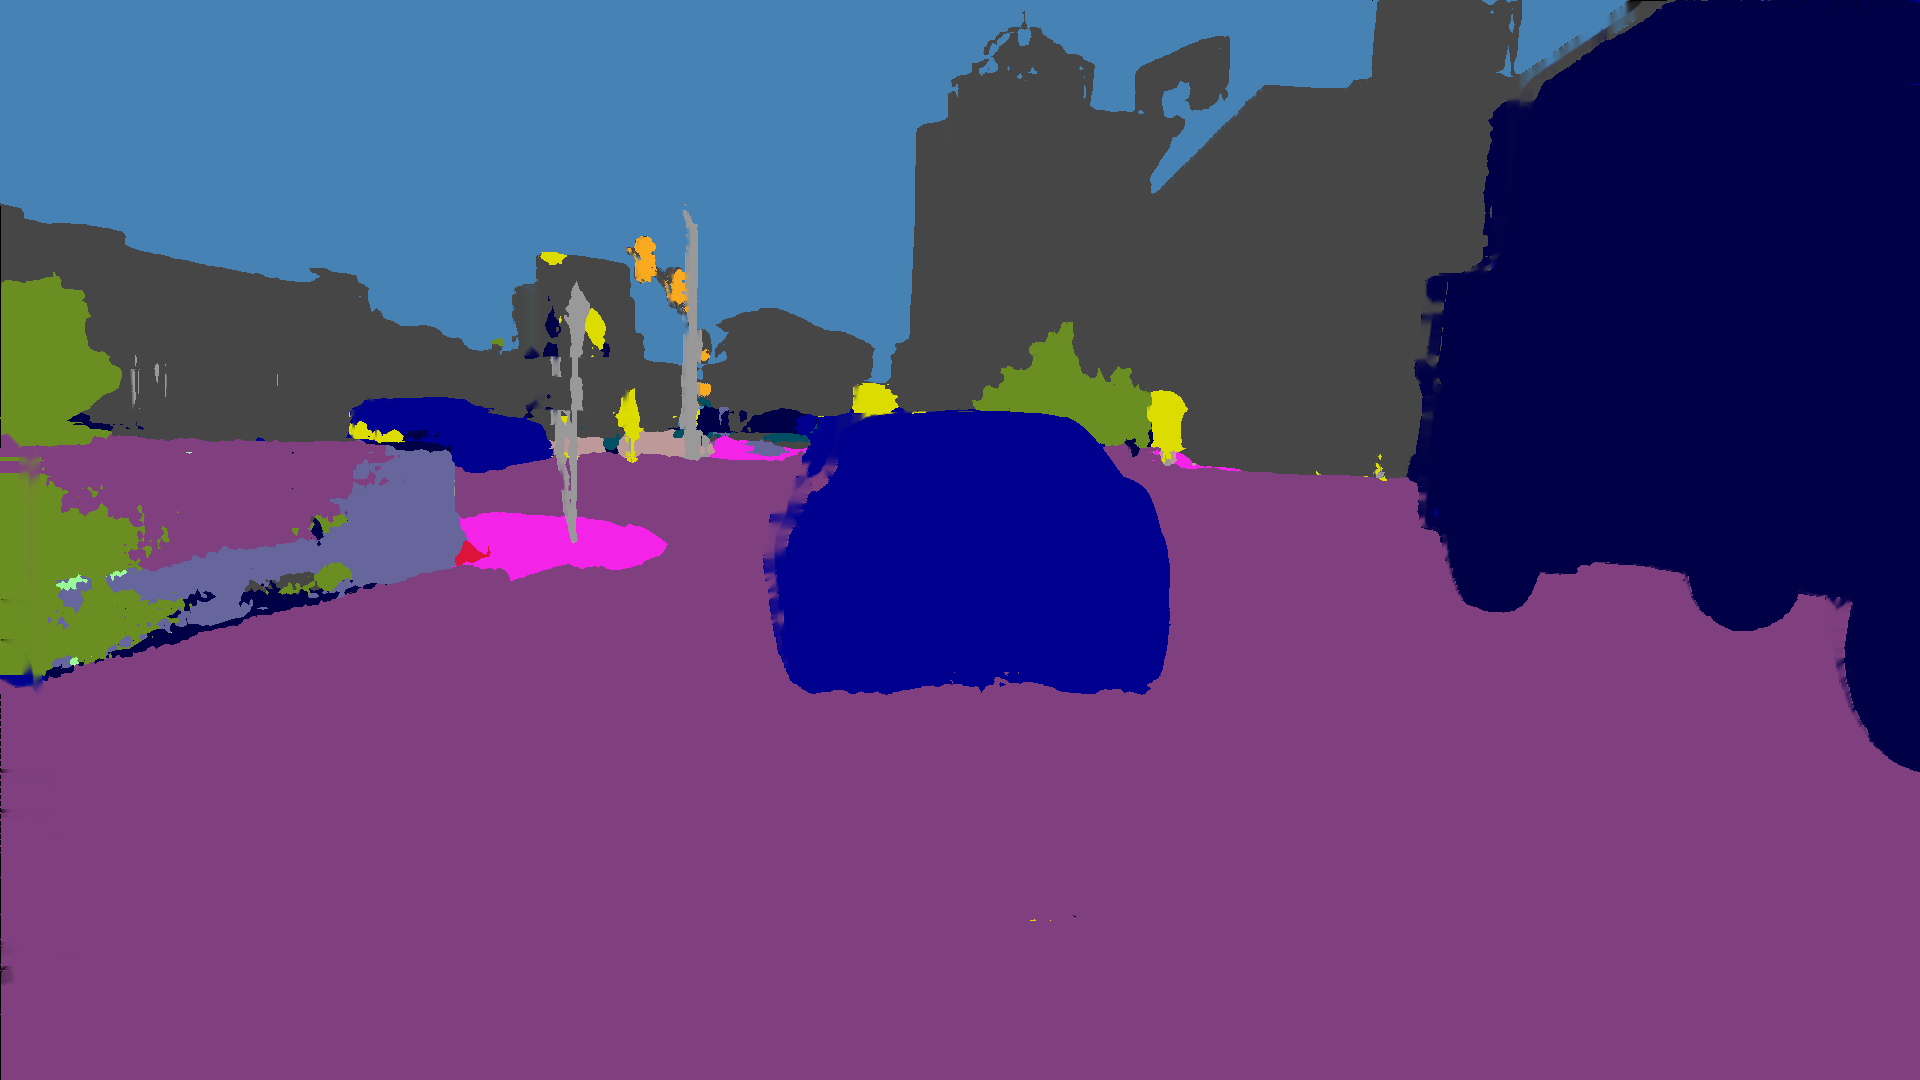

In [13]:
left_fullseg_inpaint

In [ ]:
left_pre = img.open(_FOLDERS_MAP['left_pre'])
left_est = img.open(_FOLDERS_MAP['left_est'])
left_est_inpaint = img.open(_FOLDERS_MAP['left_est_inpaint'])
gt_image = img.open(_FOLDERS_MAP['gt'])

In [16]:
left_pre_array = np.asarray(left_pre)
left_est_array = np.asarray(left_est)
left_est_inpaint_array = np.asarray(left_est_inpaint)
gt_array = np.asarray(gt_image)
#gt_array = gt_array[...,:3]
#print(left_est_array)
#print(gt_array)

In [35]:
gt_list = gt_array.reshape([-1, 3]).tolist()
[h, w, ch] = np.shape(gt_array)
#gt_mask_idx = [i for i in range(len(gt_list)) if gt_list[i] == [0, 0, 0]]
gt_mask_idx = []
for i in range(len(gt_list)):
    if gt_list[i] == [31, 120, 180] or gt_list[i] == [51, 160, 44]:
        gt_list[i] = [0, 0, 142]
    elif gt_list[i] == [178, 223, 138]:
        gt_list[i] = [0, 0, 70]
    elif gt_list[i] == [0, 0, 0]:
        gt_mask_idx.append(i)
gt_array = np.asarray(gt_list).reshape([h, w, ch])

left_est_list = left_est_array.reshape([-1, 3]).tolist()
left_est_mask_idx = [i for i in range(len(left_est_list)) if left_est_list[i] == [0, 0, 0]]

In [36]:
# inconsistency between reconstructed left prediction and left prediction image
est_pre_dif = np.abs(left_est_array - left_pre_array)
[h, w, ch] = np.shape(est_pre_dif)
est_pre_list = est_pre_dif.reshape([-1, 3]).tolist()
for i in range(len(est_pre_list)):
    if est_pre_list[i] != [0, 0, 0]:
        est_pre_list[i] = [255, 255, 255]

#for i in gt_mask_idx:
#    est_pre_list[i] = [0, 0, 0]
    
for i in left_est_mask_idx:
    est_pre_list[i] = [0, 0, 0]

correct = est_pre_list.count([0, 0, 0]) 
est_pre_acc = correct / (h*w*2 - correct)
print(est_pre_acc)

est_pre_dif = np.asarray(est_pre_list, dtype = np.uint8).reshape([h, w, ch])

est_pre_show = img.fromarray(est_pre_dif)
est_pre_show.show()

0.9861688473400892


In [37]:
# inconsistency between inpainted reconstructed left prediction and left prediction image
inpaint_pre_dif = np.abs(left_est_inpaint_array - left_pre_array)
[h, w, ch] = np.shape(inpaint_pre_dif)
inpaint_pre_list = inpaint_pre_dif.reshape([-1, 3]).tolist()
for i in range(len(inpaint_pre_list)):
    if inpaint_pre_list[i] != [0, 0, 0]:
        inpaint_pre_list[i] = [255, 255, 255]

#for i in gt_mask_idx:
#    inpaint_pre_list[i] = [0, 0, 0]

correct = inpaint_pre_list.count([0, 0, 0]) 
inpaint_pre_acc = correct / (h*w*2 - correct)
print(inpaint_pre_acc)

inpaint_pre_dif = np.asarray(inpaint_pre_list, dtype = np.uint8).reshape([h, w, ch])

inpaint_pre_show = img.fromarray(inpaint_pre_dif)
inpaint_pre_show.show()

0.9619670195387732


In [38]:
# inconsistency between left prediction image and ground truth
pre_gt_dif = np.abs(left_pre_array - gt_array)

[h, w, ch] = np.shape(pre_gt_dif)
pre_gt_list = pre_gt_dif.reshape([-1, 3]).tolist()
for i in range(len(pre_gt_list)):
    if pre_gt_list[i] != [0, 0, 0]:
        pre_gt_list[i] = [255, 255, 255]
        
#for i in gt_mask_idx:
#    pre_gt_list[i] = [0, 0, 0]

correct = pre_gt_list.count([0, 0, 0])
pre_gt_acc = correct / (h*w*2 - correct)
print(pre_gt_acc)

pre_gt_dif = np.asarray(pre_gt_list, dtype = np.uint8).reshape([h, w, ch])

pre_gt_show = img.fromarray(pre_gt_dif)
pre_gt_show.show()

0.9670311688496482


In [57]:
# inconsistency between reconstructed left prediction and ground truth
est_gt_dif = np.abs(left_est_array - gt_array)

[h, w, ch] = np.shape(est_gt_dif)
est_gt_list = est_gt_dif.reshape([-1, 3]).tolist()
for i in range(len(est_gt_list)):
    if est_gt_list[i] != [0, 0, 0]:
        est_gt_list[i] = [255, 255, 255]

for i in left_est_mask_idx:
    est_gt_list[i] = [0, 0, 0]

correct = est_gt_list.count([0, 0, 0])
est_gt_acc = correct / (h*w*2 - correct)
print('reconstructed left predictionand ground truth:', est_gt_acc)

est_gt_dif = np.asarray(est_gt_list, dtype = np.uint8).reshape([h, w, ch])


est_gt_show = img.fromarray(est_gt_dif)
est_gt_show.show()

reconstructed left predictionand ground truth: 0.9739096662173585


In [53]:
# inconsistency between inpainted reconstructed left prediction and ground truth
inpaint_pre_dif = np.abs(left_est_inpaint_array - gt_array)
[h, w, ch] = np.shape(inpaint_pre_dif)
inpaint_pre_dif = inpaint_pre_dif.reshape([-1,3]).tolist()
for i in range(len(inpaint_pre_dif)):
    if inpaint_pre_dif[i] != [0, 0, 0]:
        inpaint_pre_dif[i] = [255, 255, 255]

correct = inpaint_pre_dif.count([0, 0, 0])
inpaint_pre_dif_acc = correct / (h*w*2 - correct)
print(inpaint_pre_dif_acc)

inpaint_pre_dif = np.asarray(inpaint_pre_dif, dtype = np.uint8).reshape([h, w, ch])

inpaint_gt_show = img.fromarray(inpaint_pre_dif)
inpaint_gt_show.show()

0.9519725880392729


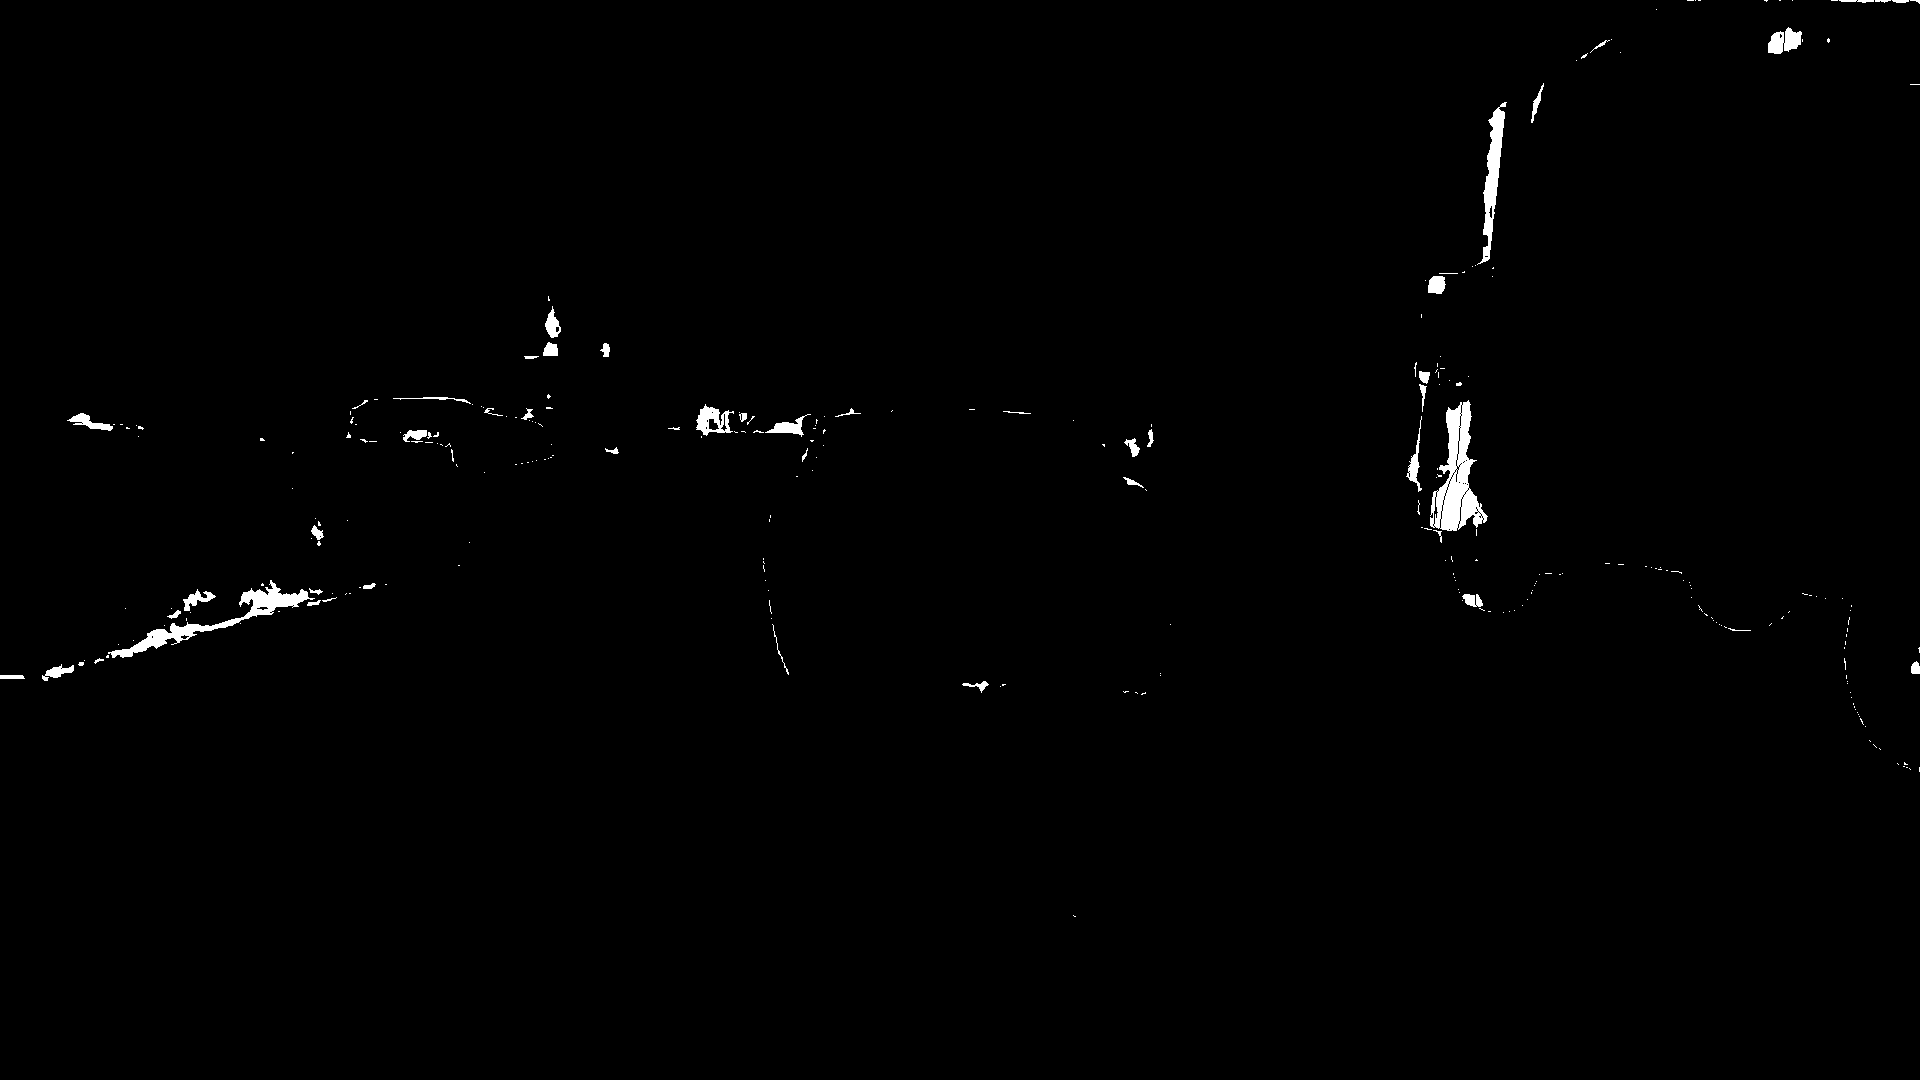

In [42]:
# inconsistency between reconstructed left image and left prediction image
est_pre_show

In [43]:
est_pre_show.save('est_pre_show.png')

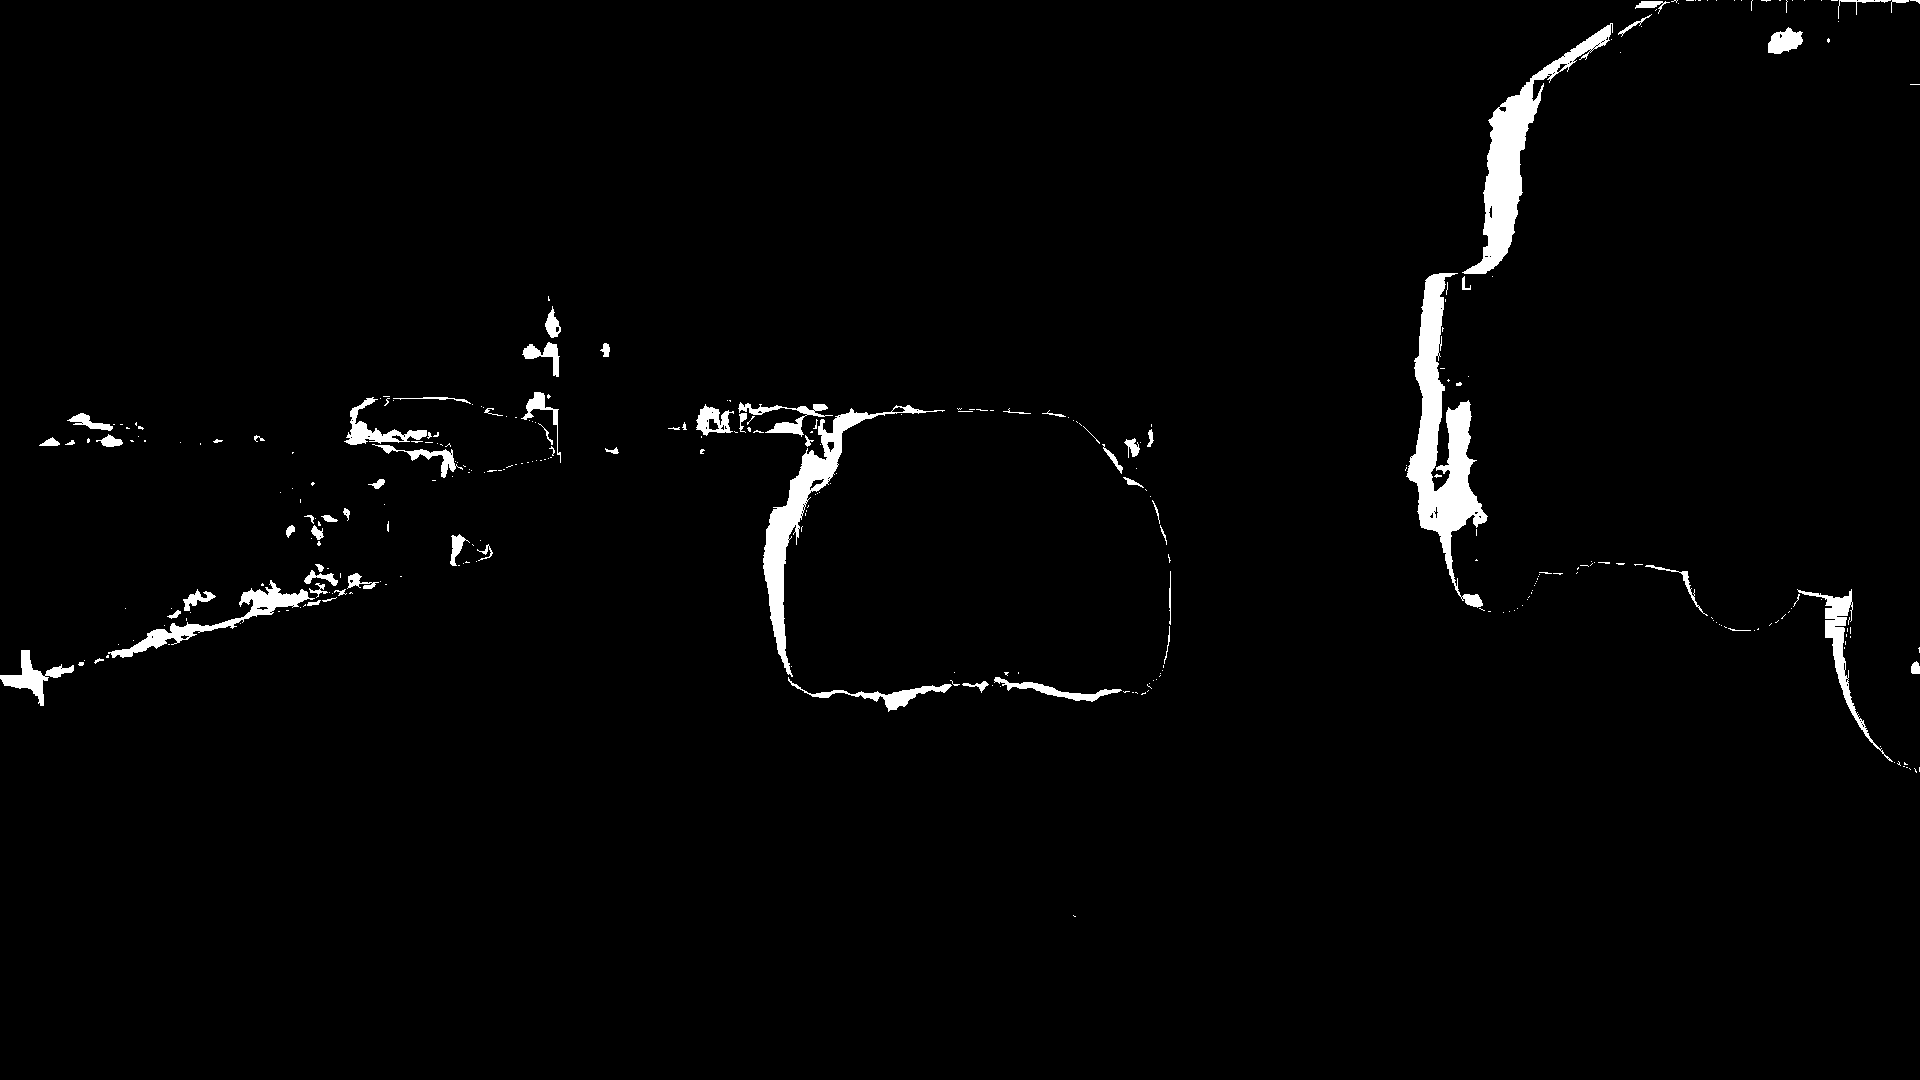

In [44]:
# inconsistency between inpainted reconstructed left prediction and left prediction image
inpaint_pre_show

In [45]:
inpaint_pre_show.save('inpaint_pre_show.png')

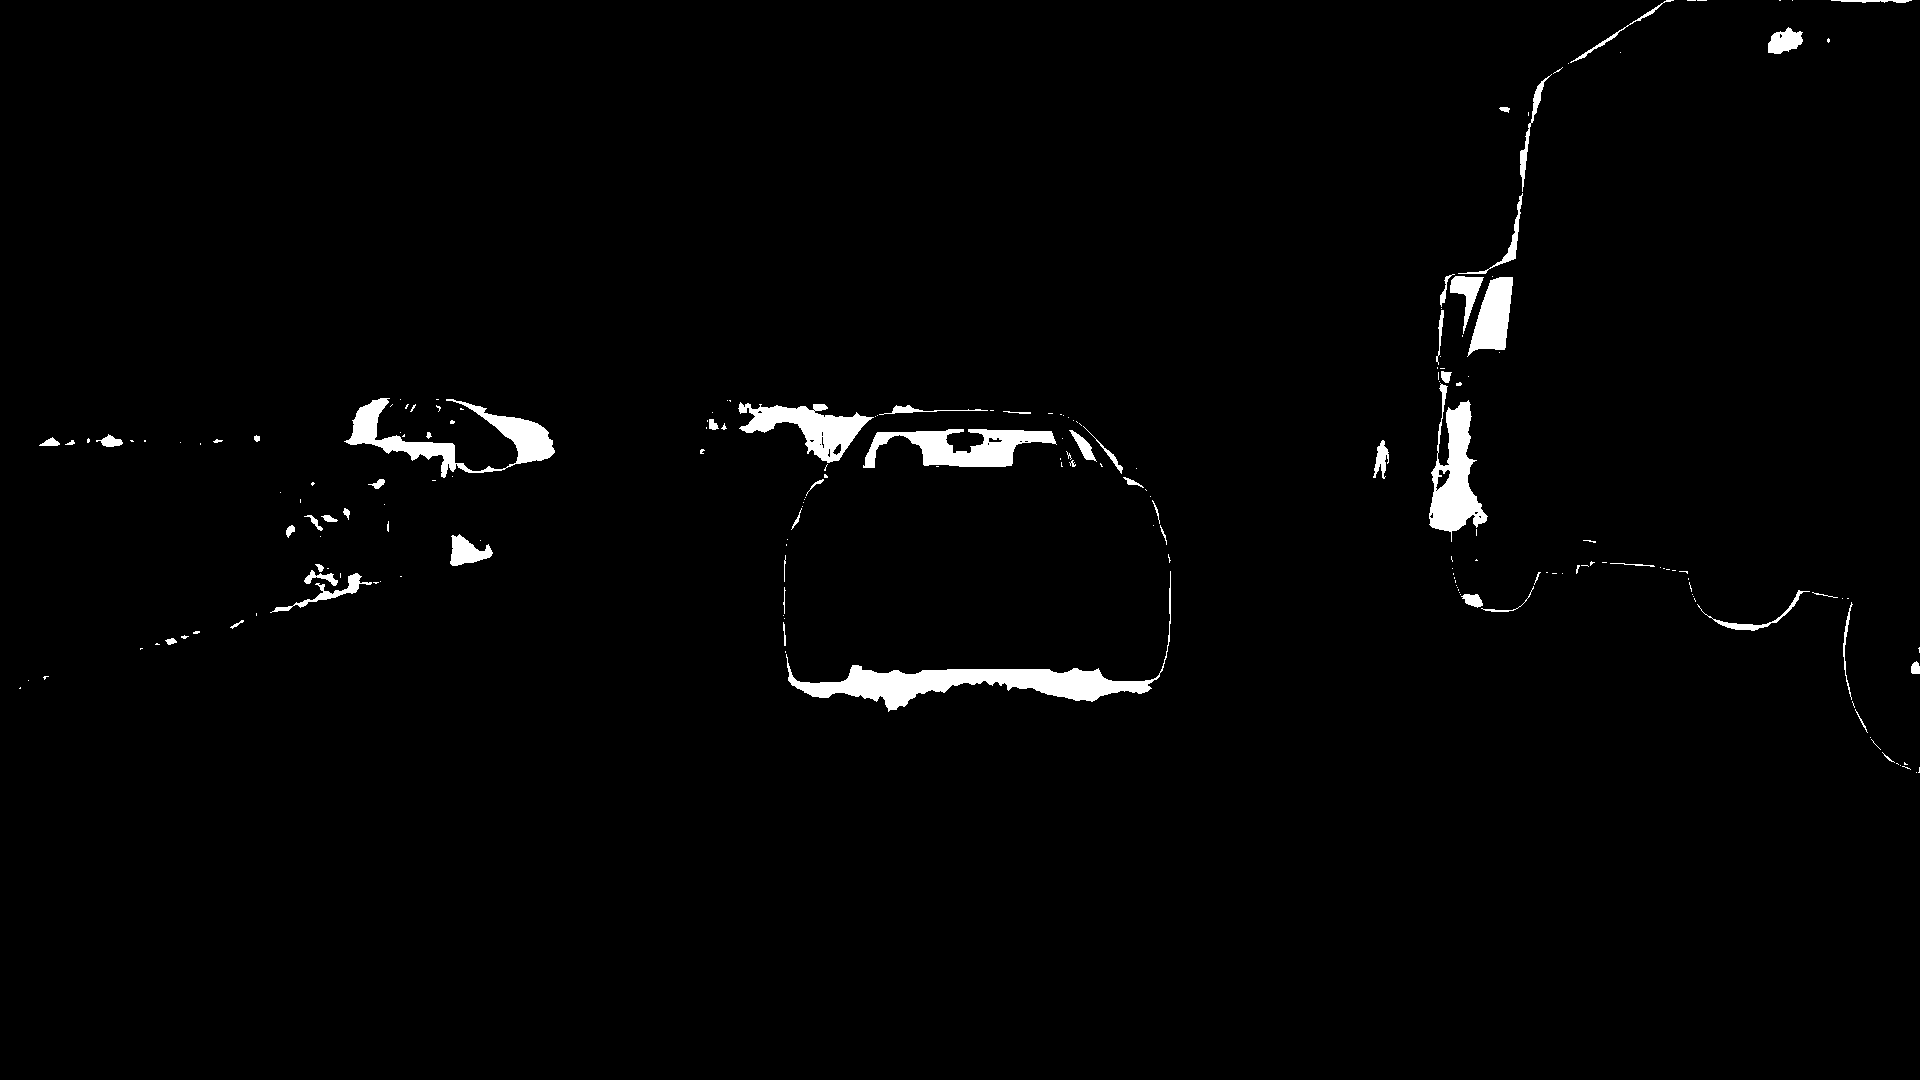

In [47]:
# inconsistency between left prediction image and ground truth
pre_gt_show

In [48]:
pre_gt_show.save('pre_gt_show.png')

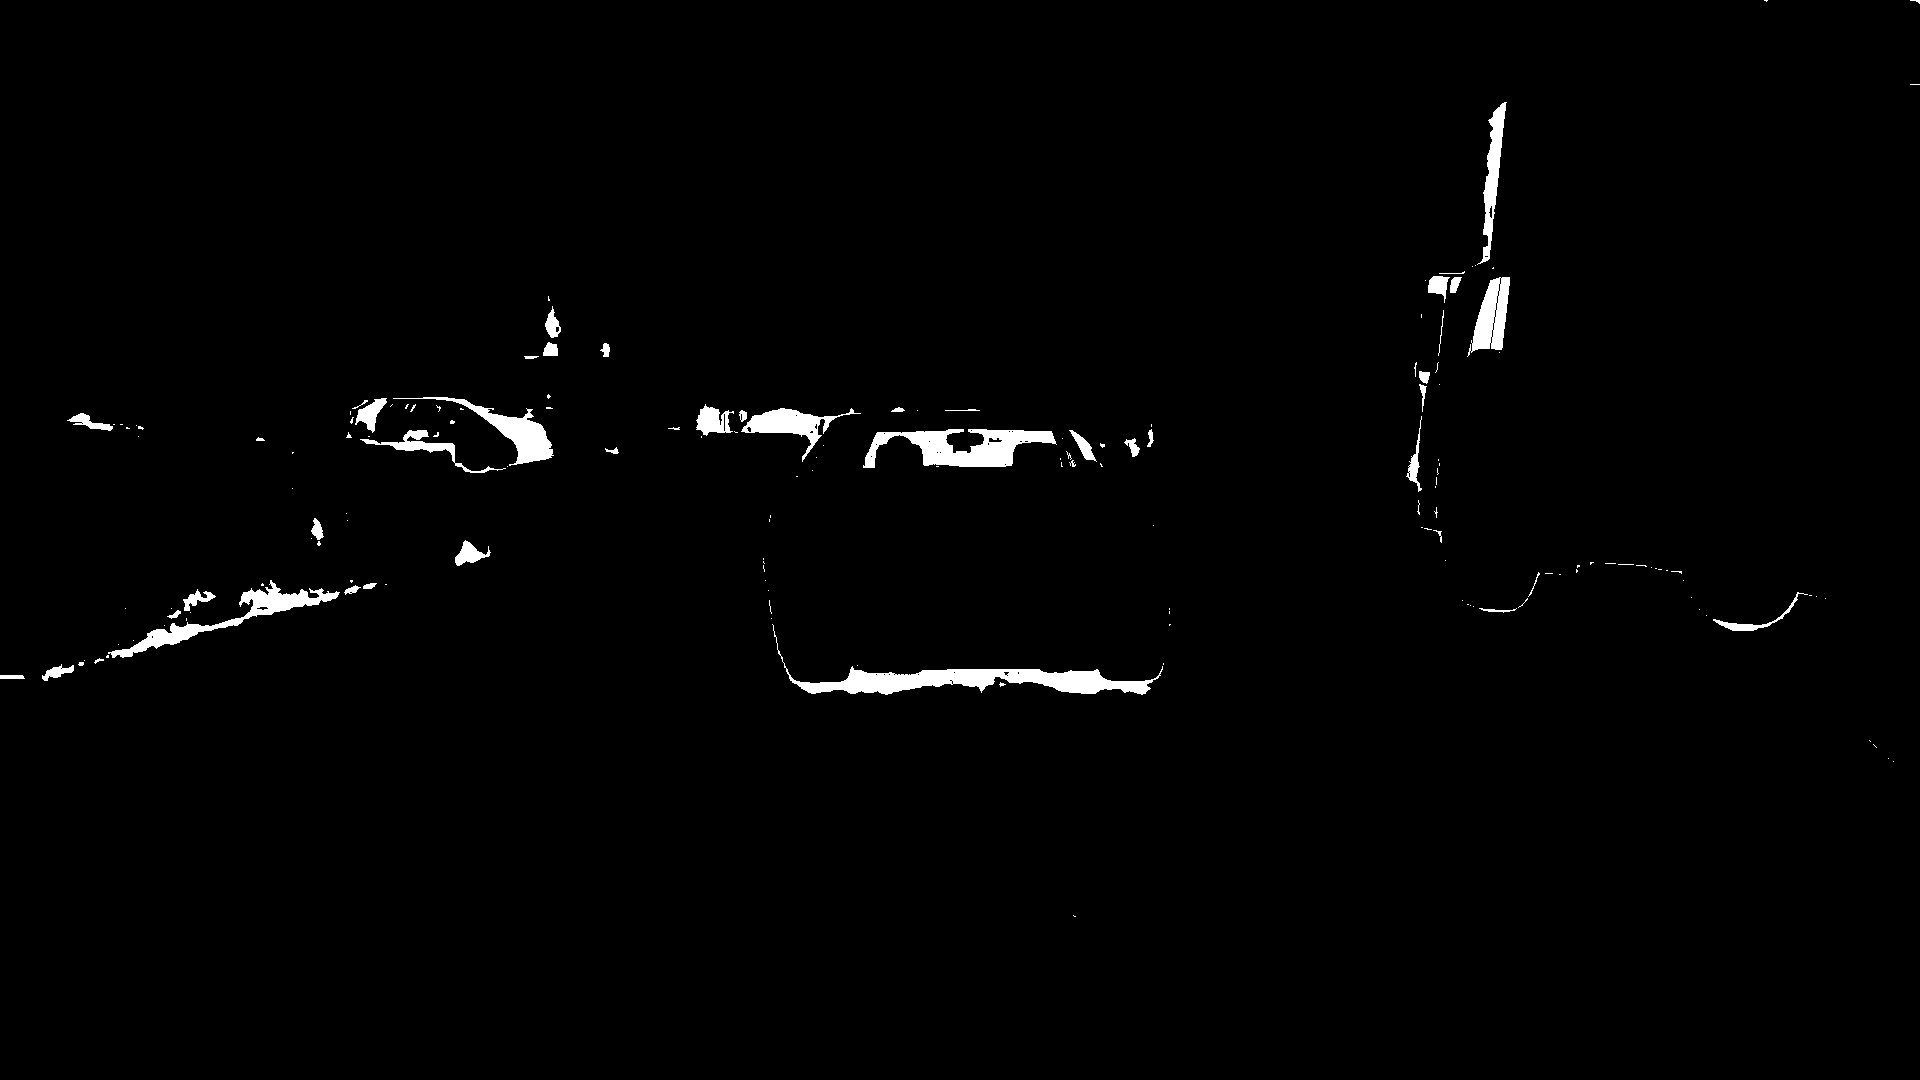

In [49]:
# inconsistency between reconstructed left image and ground truth
est_gt_show

In [50]:
est_gt_show.save('est_gt_show.png')

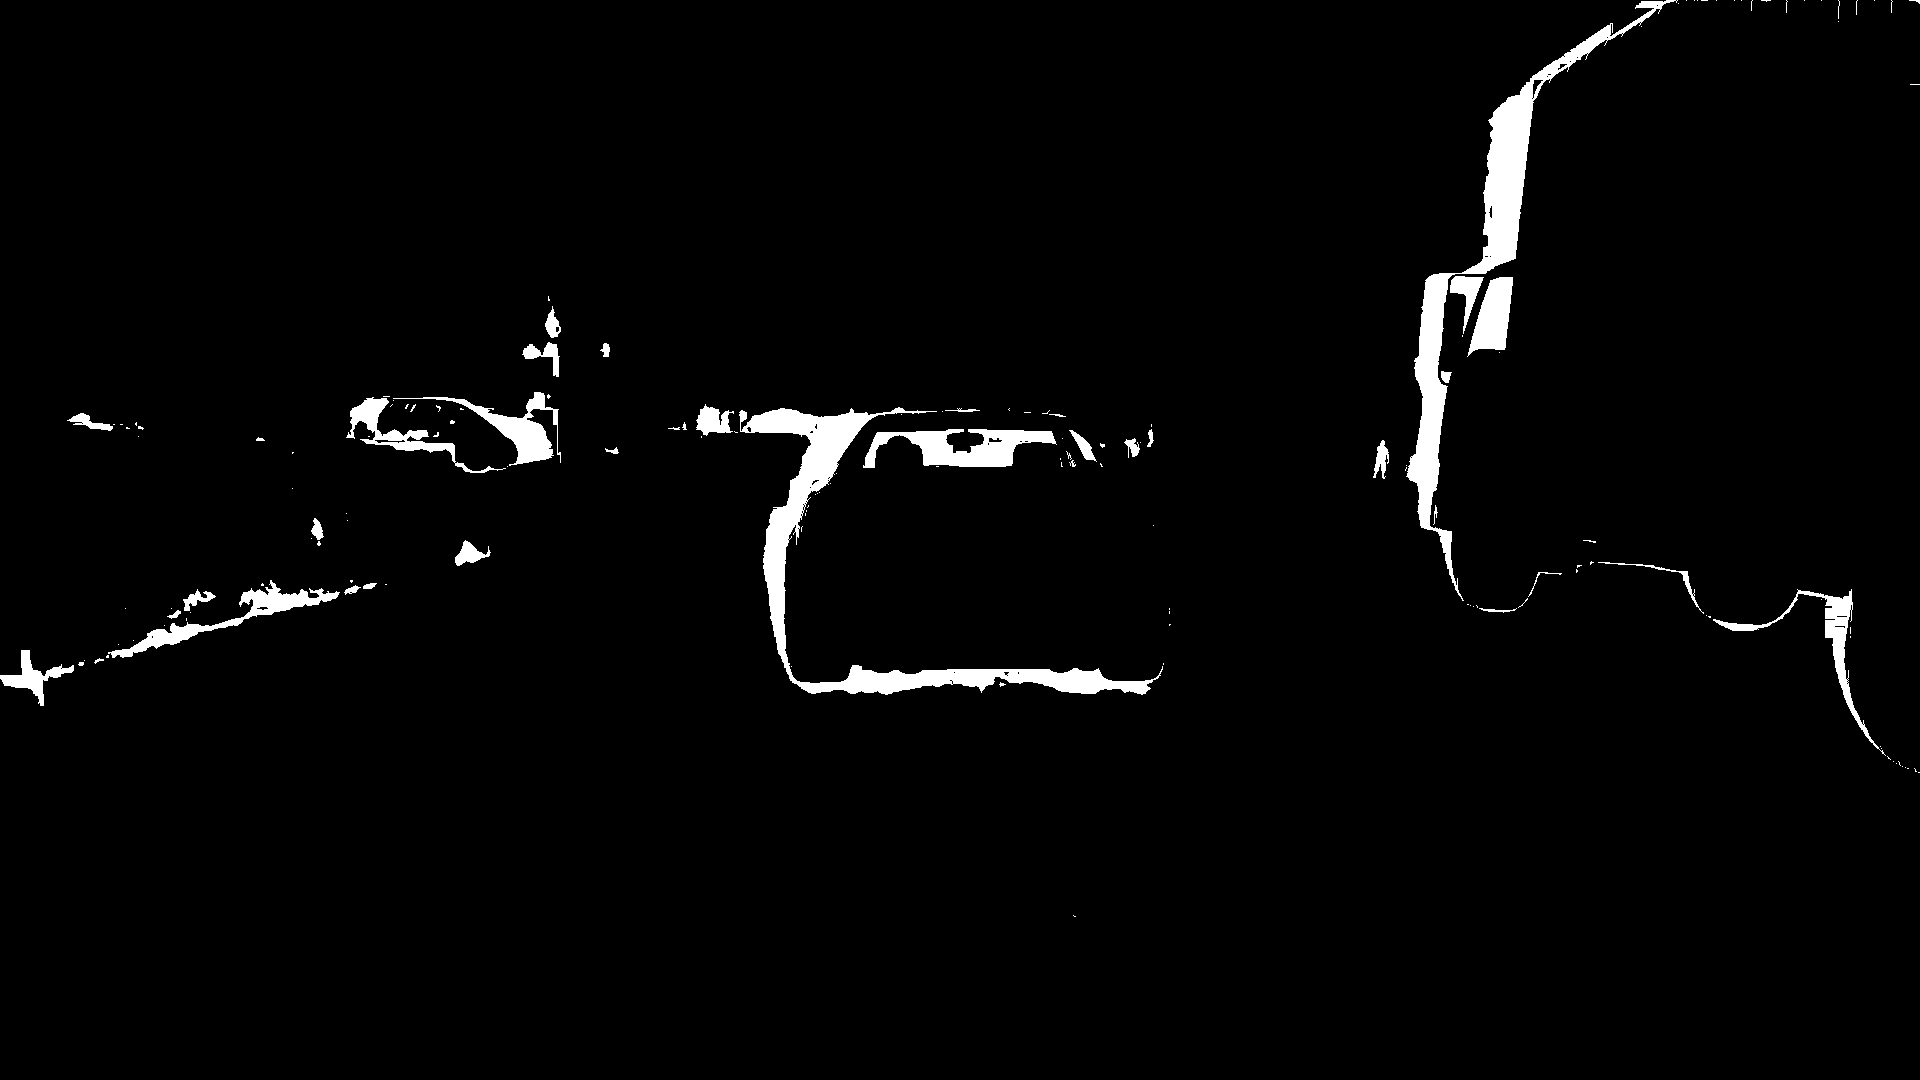

In [54]:
# inconsistency between inpainted reconstructed left prediction and ground truth
inpaint_gt_show

In [55]:
inpaint_gt_show.save('inpaint_gt_show.png')

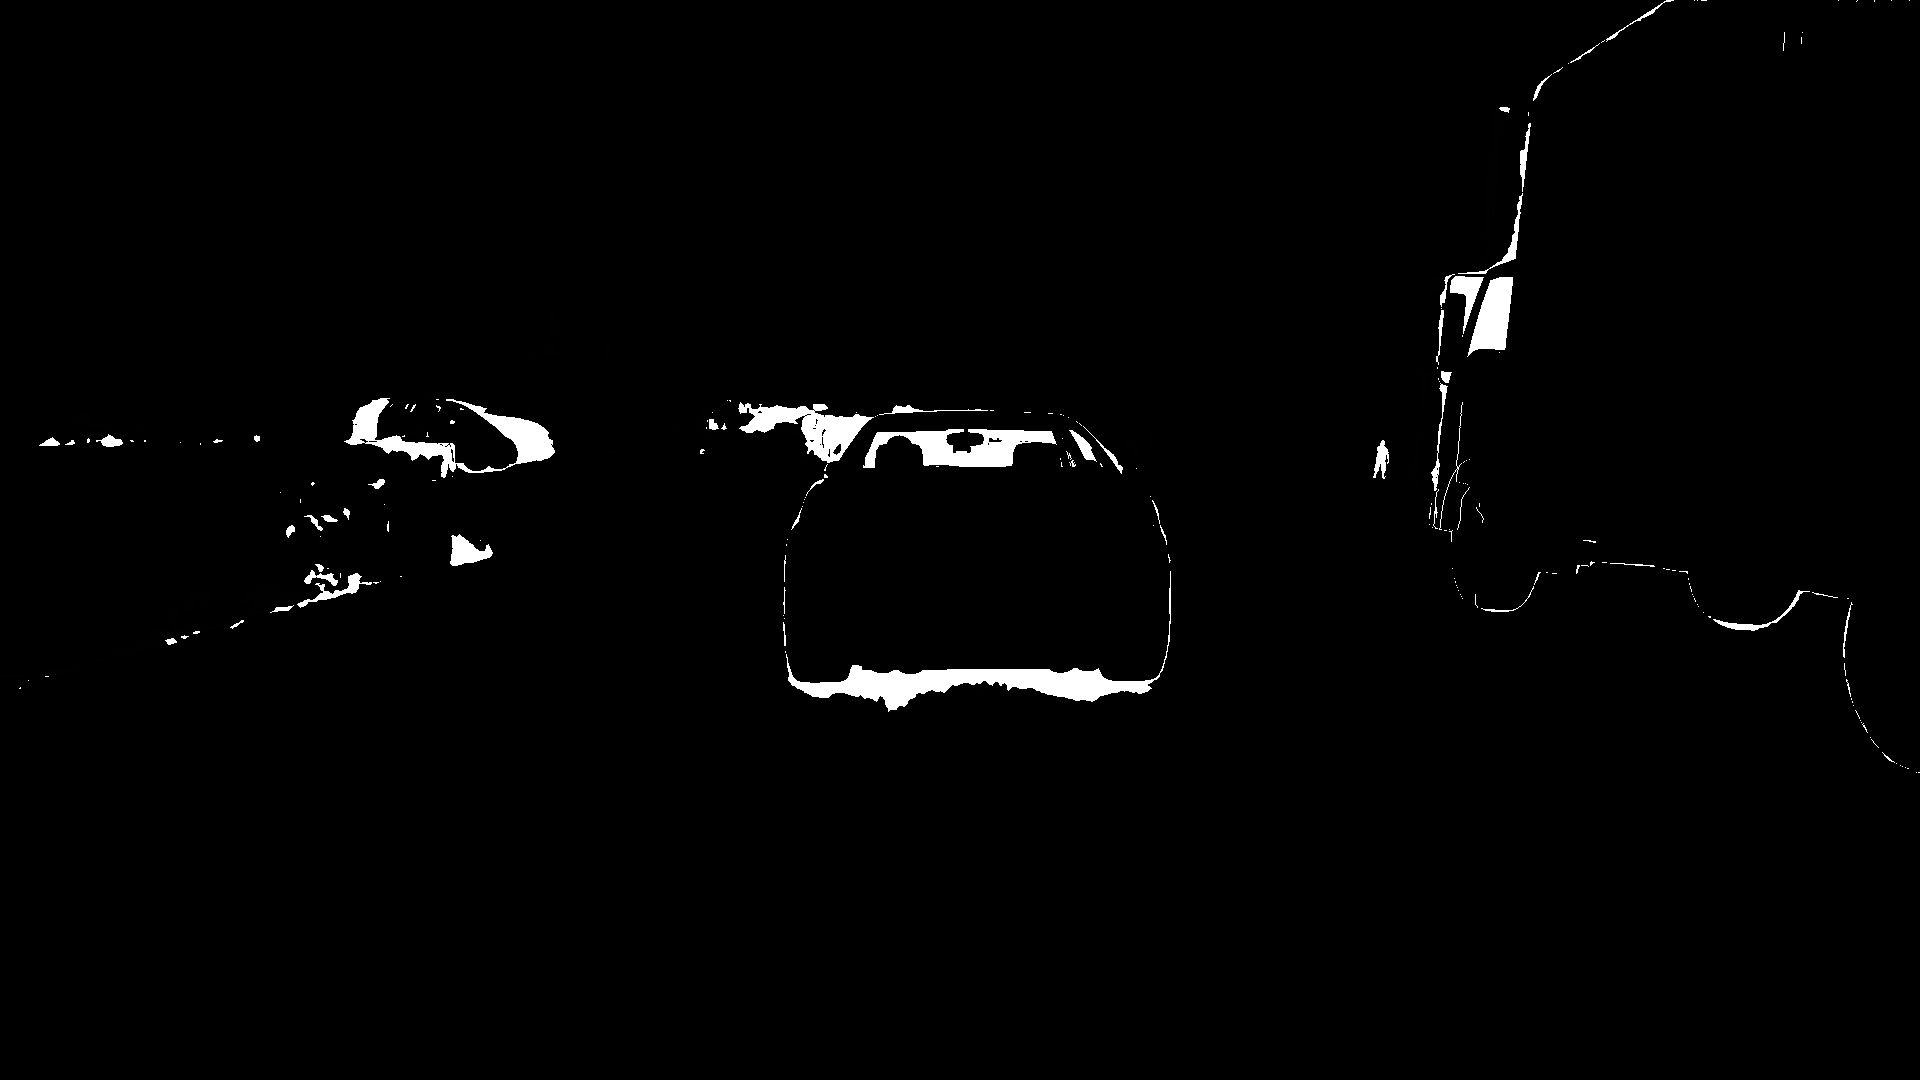

In [58]:
dif = np.abs(pre_gt_dif - est_pre_dif)
dif_show = img.fromarray(dif)
dif_show

In [59]:
dif_list = dif.reshape([-1, 3]).tolist()
[h, w, ch] = np.shape(dif)
correct = dif_list.count([0, 0, 0])
dif_list_acc = correct / (h*w*2 - correct)
print(dif_list_acc)

0.9632766155065337
